In [14]:
import numpy as np

In [63]:
# tabular_q_learning + epsilon_greedy
lamda = 0.9
N = 10
A = 2
T = 1000
epsilon = 1
alpha = 1
# r = np.array(([0, 0 ,0 ,0, 1],
#              [0.2, 0, 0, 0, 0])).transpose()
# a = np.array(([1,2,3,4,4],
#              [0,0,0,0,0])).transpose()
r = np.array(([0, 0 ,0 ,0, 0, 0, 0, 0, 0, 1],
             [0.2, 0, 0 ,0 ,0, 0, 0, 0, 0, 0 ])).transpose()
a = np.array(([1,2,3,4,5,6,7,8,9,9],
             [0, 0 ,0 ,0, 0, 0, 0, 0, 0, 0 ])).transpose()
q_value = np.zeros((N,A))
q_value = q_value + r

def random_select_q(x):
    h, w, _ = x.shape
    random_q = np.zeros((h,w)) 
    for i in range(h):
        for j in range(w):
            random_q[i,j] = np.random.choice(x[i,j])
    return random_q

print(q_value)
for t in range(T):
    ep = np.random.rand()
#     print(ep)
    if ep > epsilon:
        random_q = random_select_q(q_value[a])
#         print("random_q：\n{}".format(random_q))
        q_value = q_value + alpha*(r + lamda*random_q - q_value)
    else:
        max_q = np.amax(q_value, axis=1)
        q_value = q_value + alpha*(r + lamda*max_q[a] - q_value)

print("q_value：\n{}".format(q_value))

[[0.  0.2]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [1.  0. ]]
q_value：
[[ 3.87420489  3.6867844 ]
 [ 4.3046721   3.4867844 ]
 [ 4.782969    3.4867844 ]
 [ 5.31441     3.4867844 ]
 [ 5.9049      3.4867844 ]
 [ 6.561       3.4867844 ]
 [ 7.29        3.4867844 ]
 [ 8.1         3.4867844 ]
 [ 9.          3.4867844 ]
 [10.          3.4867844 ]]


In [215]:
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np
import time

def q_learning_nn(env, learning_rate=1.0, num_episodes=1000):
    # create the nn model
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(batch_input_shape=(1, 10)))
    model.add(layers.Dense(64, activation='sigmoid'))
    model.add(layers.Dense(2, activation='linear'))
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate))
    # q learning
    batch_size = 32
    gamma = 0.9
    epsilon = 0.9
    decay_factor = 0.999
    avg_reward_list = []
    
    for i in range(num_episodes):
        state = env.reset()
        epsilon *= decay_factor
        if i % 10 == 0:
            print("Episode {} of {}".format(i + 1, num_episodes))
        done = False
        reward_sum = 0
        X = []
        y = []
        size = 0
        while not done:
            state_vector = np.eye(10)[state:state + 1]
            Q_value = model.predict(state_vector)
            if np.random.rand() < epsilon:
                a = np.random.randint(2)
#                 a = 0
            else:
                a = np.argmax(Q_value)
            new_state, reward, done, _ = env.step(a)
            BK = reward + gamma * np.max(model.predict(np.eye(10)[new_state:new_state + 1]))
            Q_star = Q_value[0]
            Q_star[a] = BK
#             model.fit(state_vector, Q_star.reshape(-1, 2), epochs=1, verbose=0)
            state = new_state
            reward_sum += reward
            
            X.append(state_vector)
            y.append(Q_star.reshape(-1, 2))
            size += 1
            # batch
            if size == batch_size:
                for j in range(batch_size):
                    model.fit(X[j], y[j], epochs=1, verbose=0)
                X = []
                y = []
                size = 0
            
        avg_reward_list.append(reward_sum / num_episodes)
        
        if i % 10 == 0:
            print("Episode {} of {} FINISHED!".format(i + 1, num_episodes))
    plt.plot(avg_reward_list, color='red')
    plt.title('Average Reward Plot')
    plt.ylabel('Average reward per episode')
    plt.xlabel('Number of episodes')
    plt.savefig("avg_reward4.png", dpi = 100)
    plt.show()
    for i in range(10):
        print("| State {} - action {} |".format(i, model.predict(np.eye(10)[i:i + 1]).ravel()))
    return model

In [205]:
class MDP:
    def __init__(self):
        self.reward = np.array(([0, 0 ,0 ,0, 0, 0, 0, 0, 0, 1],
                           [0.2, 0, 0 ,0 ,0, 0, 0, 0, 0, 0])).transpose()
        self.state = 0
        self.count = 0
    
    def reset(self):
        self.state = 0
        self.count = 0
        return self.state
    
    def step(self, action):
        done = False
        step = 1000
        
#         print("State {}".format(self.state))
        reward = self.reward[self.state][action]
        if action == 0 :
            self.state = np.array(([1,2,3,4,5,6,7,8,9,9]))[self.state]
        elif action == 1:
            self.state = 0
        
        self.count += 1
        if self.count > step:
            done = True
        else:
            done
#         print("New State {}".format(self.state))
#         print("Reward {}".format(reward))
        return self.state, reward, done, []

Episode 1 of 1000
Episode 1 of 1000 FINISHED!
Episode 11 of 1000
Episode 11 of 1000 FINISHED!
Episode 21 of 1000
Episode 21 of 1000 FINISHED!
Episode 31 of 1000
Episode 31 of 1000 FINISHED!
Episode 41 of 1000
Episode 41 of 1000 FINISHED!
Episode 51 of 1000
Episode 51 of 1000 FINISHED!
Episode 61 of 1000
Episode 61 of 1000 FINISHED!
Episode 71 of 1000
Episode 71 of 1000 FINISHED!
Episode 81 of 1000
Episode 81 of 1000 FINISHED!
Episode 91 of 1000
Episode 91 of 1000 FINISHED!
Episode 101 of 1000
Episode 101 of 1000 FINISHED!
Episode 111 of 1000
Episode 111 of 1000 FINISHED!
Episode 121 of 1000
Episode 121 of 1000 FINISHED!
Episode 131 of 1000
Episode 131 of 1000 FINISHED!
Episode 141 of 1000
Episode 141 of 1000 FINISHED!
Episode 151 of 1000
Episode 151 of 1000 FINISHED!
Episode 161 of 1000
Episode 161 of 1000 FINISHED!
Episode 171 of 1000
Episode 171 of 1000 FINISHED!
Episode 181 of 1000
Episode 181 of 1000 FINISHED!
Episode 191 of 1000
Episode 191 of 1000 FINISHED!
Episode 201 of 1000
Ep

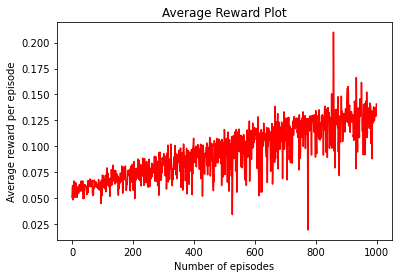

| State 0 - action [1.3606789 1.7297626] |
| State 1 - action [1.3606789 1.7297626] |
| State 2 - action [1.3606789 1.7297626] |
| State 3 - action [1.3606789 1.7297626] |
| State 4 - action [1.3606789 1.7297626] |
| State 5 - action [1.3606789 1.7297626] |
| State 6 - action [1.3606789 1.7297626] |
| State 7 - action [1.3606789 1.7297626] |
| State 8 - action [1.3606789 1.7297626] |
| State 9 - action [14.263999  6.709761] |
time cost 4123.374154806137 s


In [216]:
if __name__ == '__main__':
    time_start=time.time()
    env = MDP()
    model = q_learning_nn(env)
    time_end=time.time()
    print('time cost',time_end-time_start,'s')

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [147]:
np.array(([0, 0 ,0 ,0, 0, 0, 0, 0, 0, 1],
                           [0.2, 0, 0 ,0 ,0, 0, 0, 0, 0, 0])).transpose()

array([[0. , 0.2],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [0. , 0. ],
       [1. , 0. ]])